In [70]:
___Author___='LumberJack Jyss'

In [71]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [72]:
#data_history = []

In [137]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas_datareader as web
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
print('Librairies importées')

Importation des librairies...
Librairies importées


In [138]:
# Setting the data
start = pd.to_datetime('2015-01-28')
end = pd.to_datetime('2019-03-28')
delta = round((end-start).days)
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')

Période d'étude :  1520
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1216  jours 
Bloc 2 : 304  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


In [139]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [140]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = web.DataReader('GOOG','yahoo',start,end)
#dataframe = dataframe.iloc[:,1:]
dataframe.reset_index(inplace=True)
dataframe.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-28,520.127686,507.208801,519.918884,507.208801,1683800.0,507.208801
1,2015-01-29,508.292847,498.456970,508.203339,507.865204,4186400.0,507.865204
2,2015-01-30,536.915344,512.698608,513.036743,531.594604,5606400.0,531.594604
3,2015-02-02,530.082947,515.712036,528.819885,525.587646,2849800.0,525.587646
4,2015-02-03,530.480713,520.396240,525.110291,526.343506,2034800.0,526.343506


In [141]:
dataframe = dataframe[['Close']]
dataframe = dataframe.reset_index(drop = True)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

,Close
0,507.208801
1,507.865204
2,531.594604
3,525.587646
4,526.343506


In [142]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [143]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
epochs_custom = 770
model = Sequential()
model.add(LSTM(55, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epochs_custom, batch_size=1, verbose=1)

Epoch 1/770
837/837 [==============================] - 3s 4ms/sample - loss: 0.0155
Epoch 2/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.9421e-04
Epoch 3/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.8876e-04
Epoch 4/770
837/837 [==============================] - 2s 3ms/sample - loss: 3.0024e-04
Epoch 5/770
837/837 [==============================] - 2s 3ms/sample - loss: 3.0779e-04
Epoch 6/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.9786e-04
Epoch 7/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.9332e-04
Epoch 8/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.9920e-04
Epoch 9/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.9284e-04
Epoch 10/770
837/837 [==============================] - 2s 3ms/sample - loss: 3.0999e-04
Epoch 11/770
837/837 [==============================] - 2s 3ms/sample - loss: 2.8290e-04
Epoch 12/770
837/837 [============

In [118]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [119]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [120]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(1000*(trainY[0]), 1000*trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(1000*testY[0], 1000*testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9962.56 RMSE
Test Score: 20645.42 RMSE


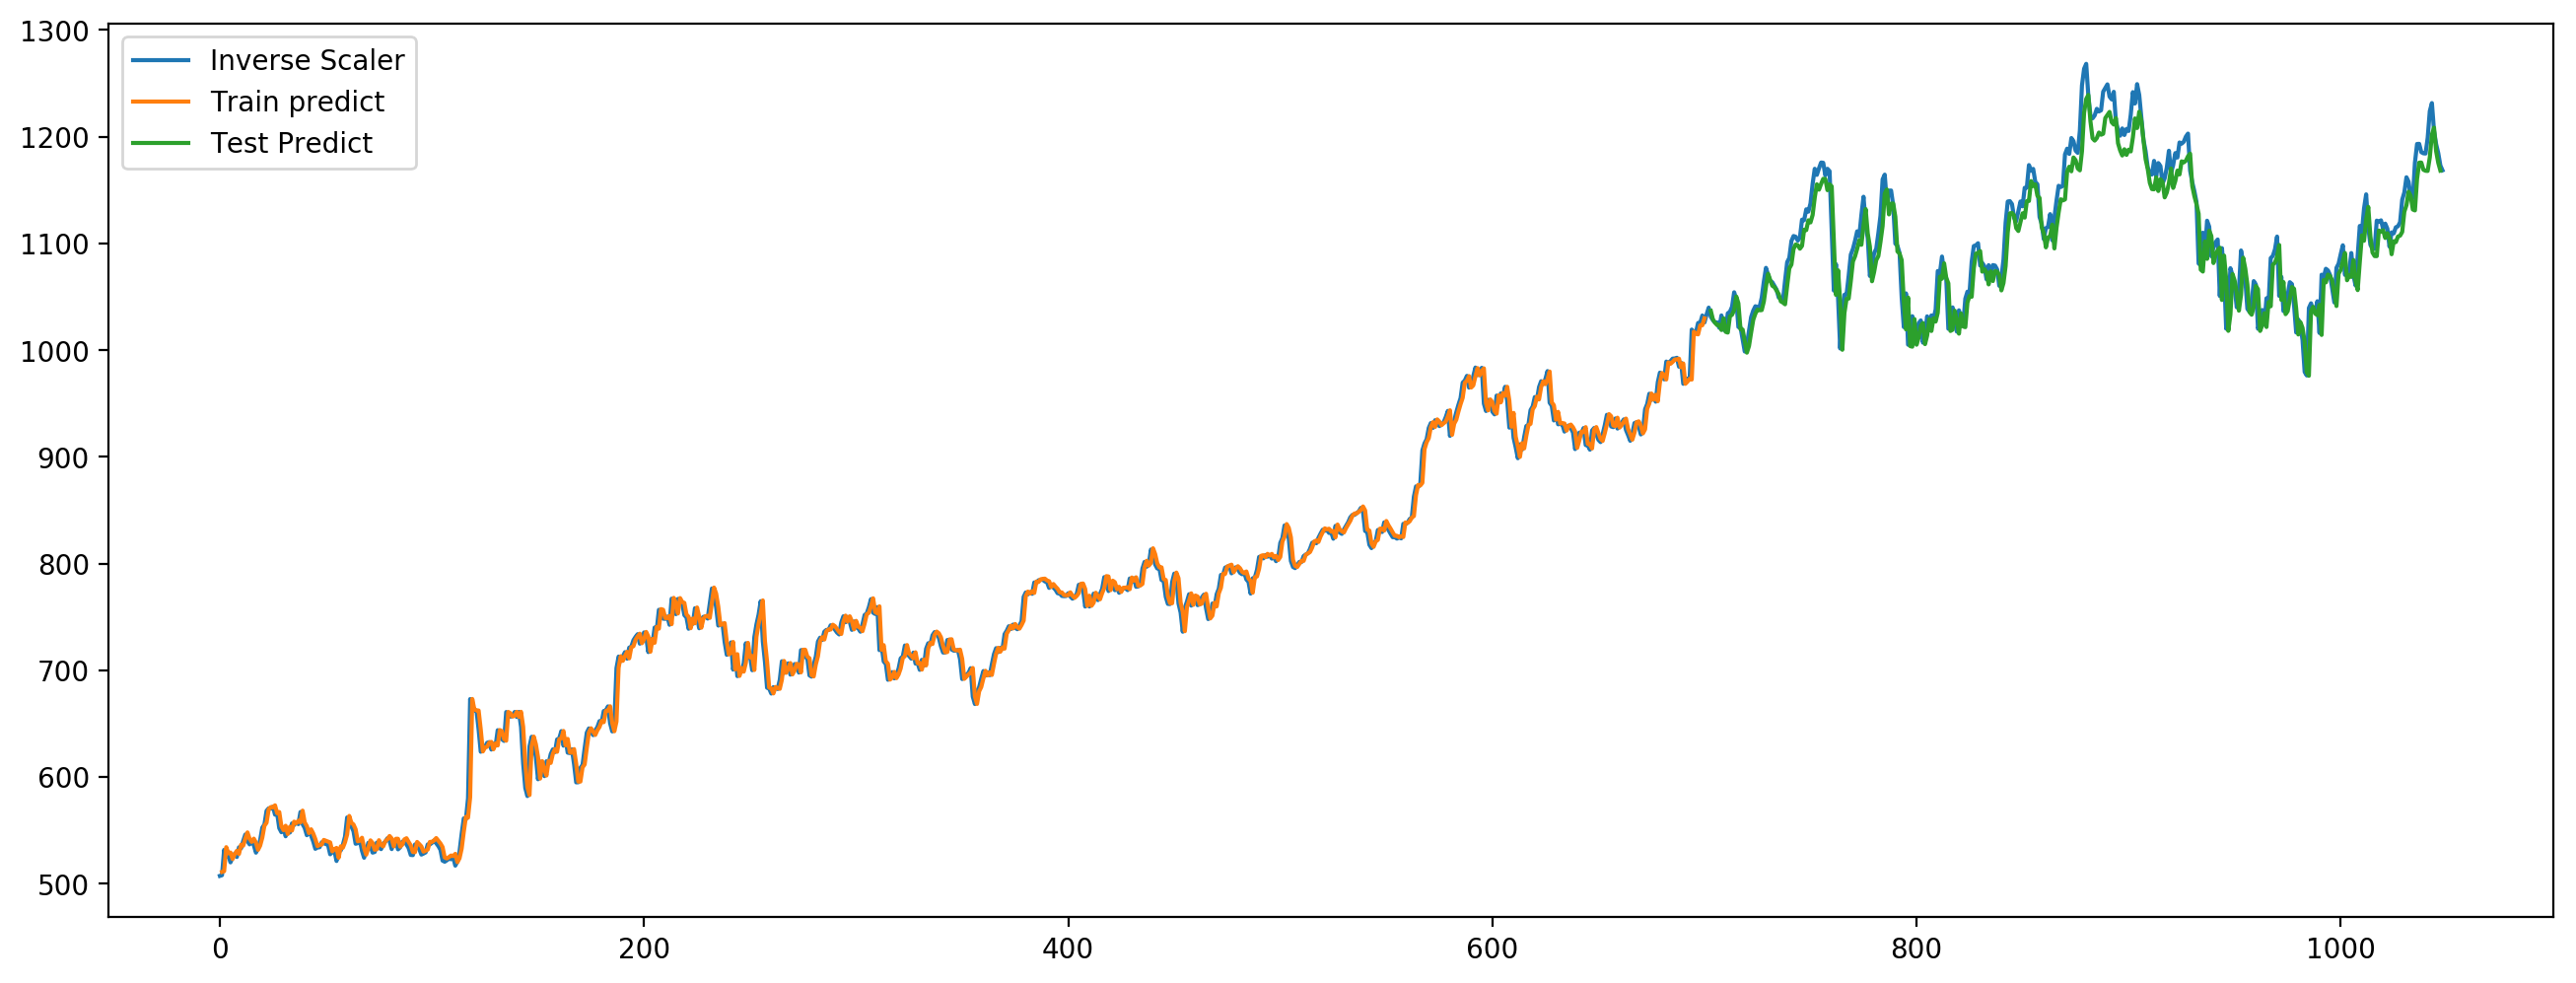

In [121]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predicZtions
plt.figure(figsize=(16,6),dpi=200)
plt.plot(scaler.inverse_transform(dataset),label='Inverse Scaler')
plt.plot(trainPredictPlot,label='Train predict')
plt.plot(testPredictPlot,label = 'Test Predict')
plt.legend()
plt.show()

In [122]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
Predictions = []
Real = []
result = []
error= []

for i in range(0,len(testPredict)):
    if scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i] < 0:
        Predictions.append('Sell')
    else:
        Predictions.append('Buy')
    
    if scaler.inverse_transform(testX[i])[0][look_back - 1] - testY[0][i] < 0:
        Real.append('Sell')
    else:
        Real.append('Buy')
    
    if Predictions[i] == Real[i]:
        result.append(True)
    else:
        result.append(False)
    
    error.append(math.sqrt((scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i])*
            (scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i])))

In [124]:
freq = pd.DataFrame({'col':result})
freq.describe()

,col
count,345
unique,2
top,False
freq,175


In [125]:
mse = pd.DataFrame({'col':error})
mse.describe()

,col
count,345.000000
mean,8.964609
std,6.367193
min,0.265381
25%,3.785644
50%,7.134155
75%,13.088867
max,29.122925


In [126]:
freq.describe()['col'][3]/freq.describe()['col'][0]

0.5072463768115942

In [127]:
accuracy = freq.describe()['col'][3]/freq.describe()['col'][0]
data_history.append([round(accuracy*100),epochs_custom,look_back,testScore,trainScore,mse.describe()['col'][3]])
df = pd.DataFrame(data_history,columns=['accuracy','epochs','look_back','trainScore','testScore','mse'])

In [128]:
df.head()

,accuracy,epochs,look_back,trainScore,testScore,mse
0,54.0,50,1,21514.455298,13513.813171,3.282593
1,54.0,200,1,17841.136177,13494.782677,0.808228
2,51.0,200,1,18849.712216,18881.615540,0.073730
3,51.0,200,1,20645.416613,9962.555713,0.265381


In [129]:
#testPredict[:,0].shape,testY[:,1].shape
testY[0,:]

array([1031.25997765, 1028.06990636, 1025.74996174, 1026.00002109,
       1020.91000689, 1032.50002158, 1019.08999949, 1018.38001605,
       1034.48997133, 1035.95993194, 1040.60998324, 1054.20999961,
       1047.41003679, 1021.66000345, 1021.40994411, 1010.16997621,
        998.67994897, 1005.15000766, 1018.38001605, 1030.93007352,
       1037.05008543, 1041.09993986, 1040.47996327, 1040.60998324,
       1049.15001794, 1064.18996239, 1077.13996965, 1070.68007302,
       1064.94993956, 1063.62996012, 1060.1199653 , 1056.73999045,
       1049.36995402, 1048.13998143, 1046.40000028, 1065.00002401,
       1082.47995246, 1086.40005912, 1102.23001326, 1106.93994815,
       1106.25999723, 1102.61000185, 1105.51998127, 1122.25998447,
       1121.76004725, 1131.97999805, 1129.7900734 , 1137.50997515,
       1155.81003654, 1169.96996446, 1164.24001247, 1170.37000497,
       1175.84000775, 1175.57996781, 1163.68990006, 1169.93993193,
       1167.69992283, 1111.90003311, 1055.80009033, 1080.59997

In [130]:
final_cut = pd.DataFrame()
final_cut['Actual'] = testY[0,:]
final_cut['Prediction'] = testPredict[:,0]
final_cut['Delta'] = (final_cut['Actual'] - final_cut['Prediction'])
final_cut.tail(15)

,Actual,Prediction,Delta
330,1143.300083,1144.748047,-1.447964
331,1142.319988,1131.802979,10.517010
332,1175.759982,1130.927490,44.832491
333,1193.199988,1160.509033,32.690954
334,1193.319936,1175.698975,17.620962
335,1185.550041,1175.802856,9.747184
336,1184.459978,1169.056396,15.403581
337,1184.260003,1168.107178,16.152825
338,1198.850004,1167.932983,30.917021
339,1223.969989,1180.584351,43.385639


In [131]:
final = final_cut
final['Prediction'] = final['Prediction'].shift(1)
final['Delta'] = (final['Actual'] - final['Prediction'])
final.tail(15)

,Actual,Prediction,Delta
330,1143.300083,1148.435059,-5.134976
331,1142.319988,1144.748047,-2.428059
332,1175.759982,1131.802979,43.957003
333,1193.199988,1130.927490,62.272497
334,1193.319936,1160.509033,32.810903
335,1185.550041,1175.698975,9.851066
336,1184.459978,1175.802856,8.657122
337,1184.260003,1169.056396,15.203607
338,1198.850004,1168.107178,30.742826
339,1223.969989,1167.932983,56.037006


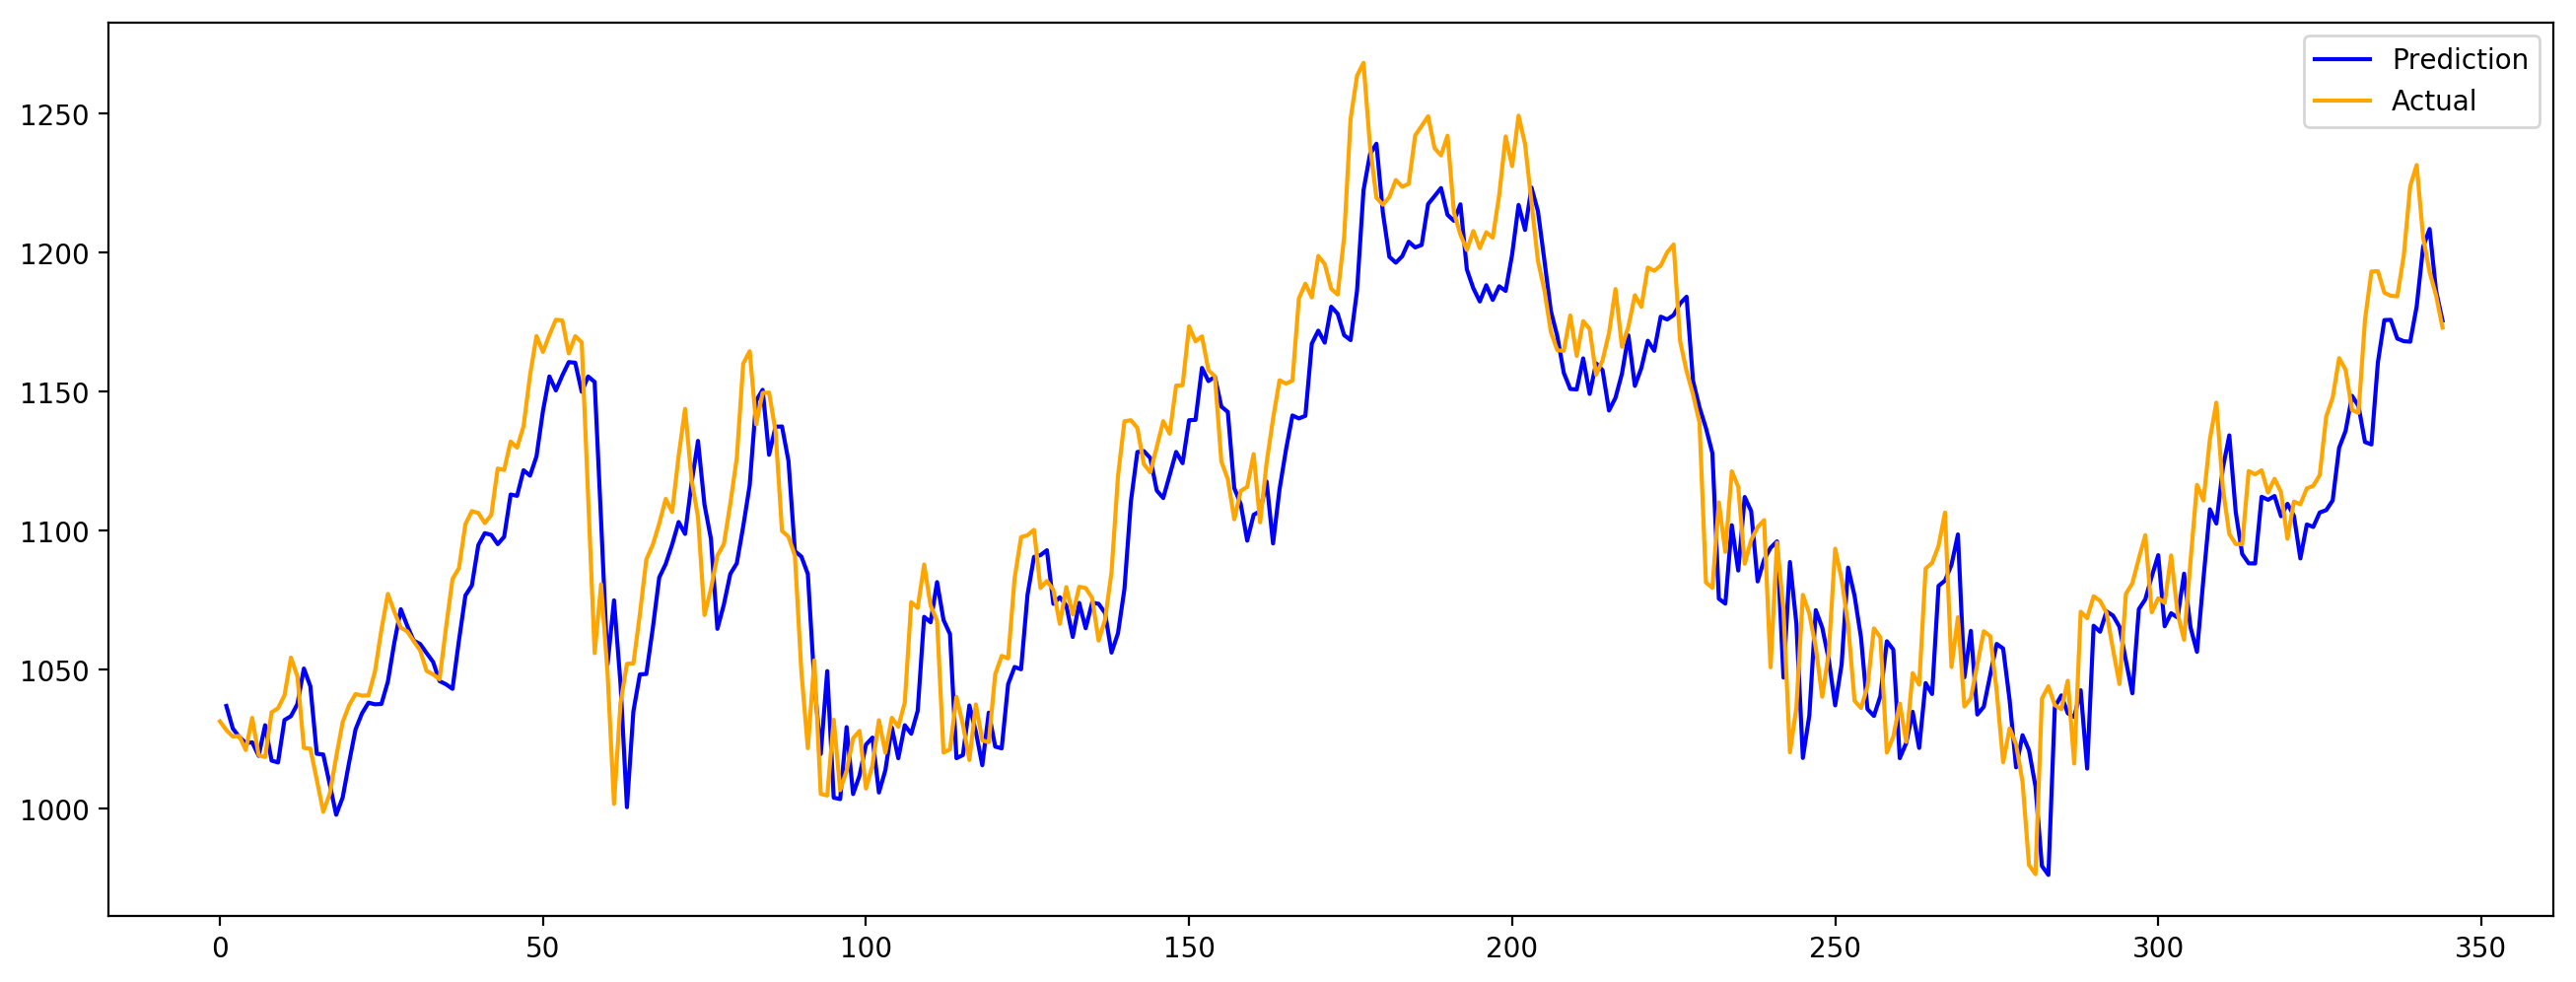

In [132]:
plt.figure(figsize=(16,6),dpi=200)
#plt.xlim(7000,8100)
#plt.ylim(1.1120,1.1262)
plt.plot(final_cut['Prediction'],label = 'Prediction',color='b')
plt.plot(final_cut['Actual'],label='Actual',color='orange')
plt.legend()


In [96]:
end

Timestamp('2019-03-28 00:00:00')

In [97]:
validation = web.DataReader('GOOG','yahoo',end,'2019-04-12')

In [98]:
validation.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-28,1171.564941,1159.431030,1171.540039,1168.489990,1012400,1168.489990
2019-03-29,1178.989990,1162.880005,1174.900024,1173.310059,1269900,1173.310059
2019-04-01,1196.660034,1182.000000,1184.099976,1194.430054,1252500,1194.430054
2019-04-02,1201.349976,1185.709961,1195.319946,1200.489990,827900,1200.489990
2019-04-03,1216.300049,1200.500000,1207.479980,1205.920044,1017800,1205.920044


In [134]:
valid_resh = np.array(validation).reshape(72,1,1)

In [135]:
pred_valid = model.predict(valid_resh,verbose=1,batch_size=200)

72/72 [==============================] - 0s 18us/sample


In [136]:
pred_valid

array([[3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.252188],
       [3.25